In [2]:
#Importing Packages
import pandas as pd  #for Datastructres and tools
import numpy as np #for Arrays and Matrices
import scipy as sp #for Integral and Differtiations
import matplotlib.pyplot as plt #for Visualization
import seaborn as sb #for highLevel Visualization
import sklearn as sk #for machine learning
import statsmodels.api as sm #for statiscal models, analysis

In [3]:
df = pd.read_csv(r"C:\Users\Owner\Downloads\attrition.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   EducationField           1470 non-null   object
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   Gender                   1470 non-null   object
 7   JobInvolvement           1470 non-null   int64 
 8   JobLevel                 1470 non-null   int64 
 9   JobSatisfaction          1470 non-null   int64 
 10  MaritalStatus            1470 non-null   object
 11  MonthlyIncome            1470 non-null   int64 
 12  OverTime                 1470 non-null   object
 13  TotalWorkingYears        1470 non-null   int64 
 14  WorkLifeBalance          1470 non-null  

In [6]:
df.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.721769,2.729932,2.063946,2.728571,6502.931293,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,1.093082,0.711561,1.106940,1.102846,4707.956783,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000
max,60.000000,1.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,29.000000


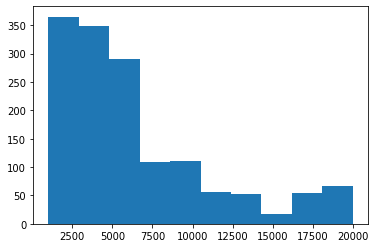

In [7]:
plt.hist(df['MonthlyIncome'])
plt.show()

In [8]:
df.groupby('Department').agg({'MonthlyIncome':['mean', 'std', 'var']}).reset_index()

Department MonthlyIncome                           
                                   mean          std           var
0         Human Resources   6654.507937  5788.732921  3.350943e+07
1  Research & Development   6281.252862  4895.835087  2.396920e+07
2                   Sales   6959.172646  4058.739322  1.647336e+07

In [57]:
attrition_count = df[df.Attrition == 1].groupby('Gender').agg({'Attrition': 'count'}).reset_index()

In [58]:
attrition_count['percentage'] = 100 * attrition_count.Attrition/attrition_count.Attrition.sum()
attrition_count

,Gender,Attrition,percentage
0,Female,87,36.708861
1,Male,150,63.291139


In [11]:
overTime_count = df[(df.OverTime == 'Yes') & (df.Attrition==1)].groupby('EducationField').agg({'OverTime': 'count'}).reset_index()
overTime_count

,EducationField,OverTime
0,Human Resources,3
1,Life Sciences,51
2,Marketing,21
3,Medical,32
4,Other,8
5,Technical Degree,12


In [23]:
df.groupby('Gender').agg({'MonthlyIncome':['mean', 'std', 'var'],'Age':['mean', 'std', 'var'],
                          'TotalWorkingYears':['mean', 'std', 'var']}).reset_index()

Gender MonthlyIncome                                   Age            \
                   mean          std           var       mean       std   
0  Female   6686.566327  4695.608507  2.204874e+07  37.329932  9.266083   
1    Male   6380.507937  4714.856577  2.222987e+07  36.653061  9.042329   

             TotalWorkingYears                       
         var              mean       std        var  
0  85.860295         11.726190  7.936601  62.989637  
1  81.763719         10.981859  7.665222  58.755630

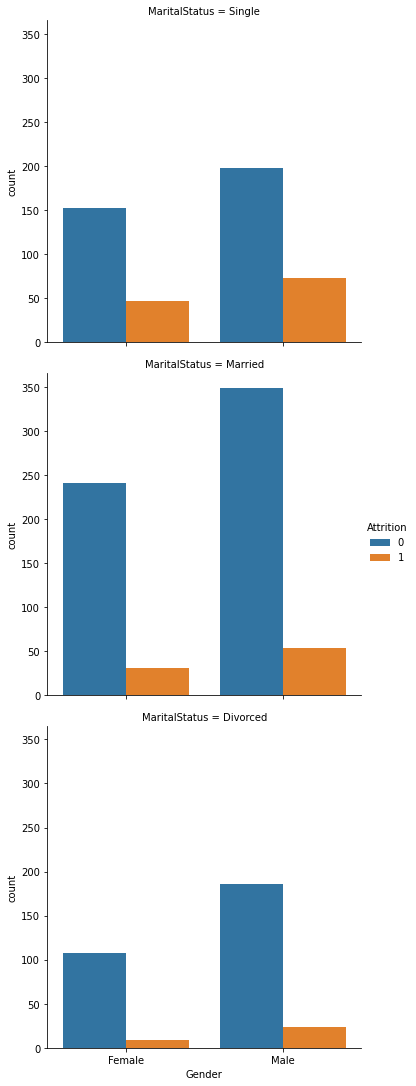

In [66]:
sb.catplot(x='Gender',data=df,hue='Attrition',row='MaritalStatus',kind='count')

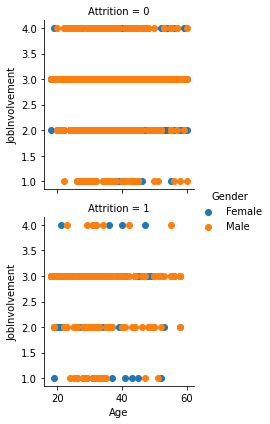

In [72]:
g = sb.FacetGrid(df,row='Attrition',hue='Gender')
g = (g.map(plt.scatter,"Age","JobInvolvement").add_legend())

#Problem here is there is no continous data (for example:-JobInvolvement)

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

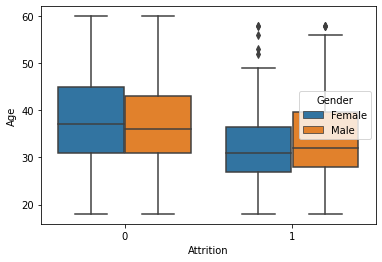

In [75]:
sb.boxplot(x='Attrition',y='Age',data=df,hue='Gender')